## Intoduction: Business Problem

Berlin is the capital of Germany. Its rich culture, diverse music scene, and broad prospectus of food and drink locations make the city highly popular with young people and students. Every year over 40 million 20-29 year olds visit Berlin of which nearly 200,000 are foreign students, attracted by the prospect of studying in the most multicultural city in Germany with its 175 museums and over 100 vegan friendly restaurants among other attractions. However, Berlin also has the highest crime rate of any German region with 13,746 per 100,000 people in 2019 - more than double the German average. Thus, for students contemplating studying abroad in Berlin, careful consideration of housing location is important to ensure safety.

This project will consider the scenario in which a student has decided to study abroad in Berlin for a year, and is trying to determine the best neighborhood to live in during this time. Primarily, the student is concerned with their safety while living abroad and so choosing a district with historically low crime rates is crucial to their decision. Once they have selected a desired district, the student then wishes to select a neighborhood based on criteria including the availability of various venues (food, drink, music etc.) nearby.

## Data

Based on the students requirements, factors that will influence our decison are: 
* The crime rate in each of the districts during the last year.
* The most common venues in each of the neighborhoods in the safest district selected.

The following data sources will be needed to source the required information:
* A dataset consisting of the crime statistics from each district of Berlin from 2012-2019 is obtained from Kaggle.
* More information regarding the districts of Berlin is scraped from a Wikipedia page using the Beautifulsoup library.
* Neighborhood co-ordinates are obtained/generated using Google Maps API geocoding. 
* The number of venues and their type and location in every neighborhood are obtained using the Foursquare API.

### Preprocessing a real world data set from Kaggle showing Berlin Crimes from 2012 to 2019

#### Berlin crime data

About this file

* Year: Year of statistics (2012 - 2019)
* District: Name of district
* Code: Neighborhood ID
* Location: Neighborhood
* Robbery: Robbery not on street
* Street_robbery: Robbery on street
* Injury: Injury from assault
* Agg_assault: Aggravated assault
* Threat: Deprivation of liberty, coercion, threat, persecution
* Theft: Larceny
* Car: Car theft
* From_car: Theft from car
* Bike: Bike theft
* Burglary: Burglary
* Fire: Using the fire with damage without intention
* Arson: Using the fire with damage with intention
* Damage: Property damage
* Graffiti: Property damage due the graffiti
* Drugs: Crimes connected with drugs
* Local: Crime is close to the living place of criminal


URL: https://www.kaggle.com/danilzyryanov/crime-in-berlin-2012-2019


#### Importing libraries

In [632]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

!pip install geocoder
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


#### Foursquare credentials

In [633]:
CLIENT_ID = 'J40CHXDKZUWRZO3BMHRVEZIGCYQDUOJCZ0U1Q5EEFGBTP0J1' 
CLIENT_SECRET = 'TJ5X0SCU2ZWZBSLX2LJQVGGFR5Y5UO3TUN0PNMRSTQVPBME1' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: J40CHXDKZUWRZO3BMHRVEZIGCYQDUOJCZ0U1Q5EEFGBTP0J1
CLIENT_SECRET:TJ5X0SCU2ZWZBSLX2LJQVGGFR5Y5UO3TUN0PNMRSTQVPBME1


#### Read in dataset

In [634]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a6798527b7344a6e95343cb6b487d1d2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1JWbYgrYXgKrrZL-9t9OF84M8QwdJhXnJ6GO6celE1Qo',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a6798527b7344a6e95343cb6b487d1d2.get_object(Bucket='courseracapstone-donotdelete-pr-p2l9p7zzhzf89a',Key='Berlin_crimes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


#### Accessing most recent crime data (2019)

In [635]:
# Taking only the most recent year (2016) and dropping the rest
df.drop(df.index[df['Year'] != 2019], inplace = True)

df.drop(df.columns[[1]], axis = 1)

# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [636]:
df.shape

(150, 20)

In [637]:
df.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2019,Mitte,10111,Tiergarten Süd,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231,980
1,2019,Mitte,10112,Regierungsviertel,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170,1057
2,2019,Mitte,10113,Alexanderplatz,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
3,2019,Mitte,10114,Brunnenstraße Süd,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86,902
4,2019,Mitte,10221,Moabit West,66,29,685,210,202,2107,47,322,326,93,28,15,641,91,618,1409


In [638]:
df.columns = ['Year', 'District', 'Code','Neighbourhood','Robbery','Street_robbery','Injury','Agg_assault', 'Threat', 'Theft','Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs', 'Local']
df.head()

,Year,District,Code,Neighbourhood,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2019,Mitte,10111,Tiergarten Süd,60,35,365,92,128,2271,15,198,296,55,13,6,347,77,231,980
1,2019,Mitte,10112,Regierungsviertel,42,20,554,136,152,3692,13,172,352,22,19,4,497,162,170,1057
2,2019,Mitte,10113,Alexanderplatz,173,102,1966,500,420,11233,63,587,940,137,43,12,1307,381,1133,3813
3,2019,Mitte,10114,Brunnenstraße Süd,40,29,268,64,79,1859,39,182,361,64,18,7,424,172,86,902
4,2019,Mitte,10221,Moabit West,66,29,685,210,202,2107,47,322,326,93,28,15,641,91,618,1409


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            150 non-null    int64 
 1   District        150 non-null    object
 2   Code            150 non-null    int64 
 3   Neighbourhood   150 non-null    object
 4   Robbery         150 non-null    int64 
 5   Street_robbery  150 non-null    int64 
 6   Injury          150 non-null    int64 
 7   Agg_assault     150 non-null    int64 
 8   Threat          150 non-null    int64 
 9   Theft           150 non-null    int64 
 10  Car             150 non-null    int64 
 11  From_car        150 non-null    int64 
 12  Bike            150 non-null    int64 
 13  Burglary        150 non-null    int64 
 14  Fire            150 non-null    int64 
 15  Arson           150 non-null    int64 
 16  Damage          150 non-null    int64 
 17  Graffiti        150 non-null    int64 
 18  Drugs     

In [640]:
df['District'].value_counts()

Treptow-Köpenick              21
Charlottenburg-Wilmersdorf    18
Pankow                        17
Lichtenberg                   14
Reinickendorf                 12
Neukölln                      11
Mitte                         11
Marzahn-Hellersdorf           10
Spandau                       10
Friedrichshain-Kreuzberg       9
Steglitz-Zehlendorf            9
Tempelhof-Schöneberg           8
Name: District, dtype: int64

In [641]:
df.District.unique()

array(['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick',
       'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf'],
      dtype=object)

In [642]:
District_df = df.groupby(['District'],as_index=False)[['Robbery','Street_robbery','Injury','Agg_assault', 'Threat', 'Theft','Car', 'From_car', 'Bike', 'Burglary', 'Fire', 'Arson', 'Damage', 'Graffiti', 'Drugs', 'Local']].sum()
District_df

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,Charlottenburg-Wilmersdorf,420,212,4131,969,1484,22571,575,3352,3088,1096,225,122,3911,852,1174,10407
1,Friedrichshain-Kreuzberg,820,579,5006,1752,1237,25650,387,2120,4094,513,282,102,5349,1454,5232,12431
2,Lichtenberg,260,168,3043,675,950,11637,638,1631,1651,379,202,89,2986,514,534,6882
3,Marzahn-Hellersdorf,239,153,2967,588,906,8605,598,1379,785,331,228,89,2656,445,544,5934
4,Mitte,707,407,7595,1951,2157,35601,401,3330,3817,845,291,104,6142,1601,4233,15967
5,Neukölln,480,273,4072,1219,1467,19291,370,2836,2251,916,222,124,3996,555,2126,10677
6,Pankow,284,176,3174,651,1156,17202,626,1985,3976,846,201,72,4249,1224,788,8054
7,Reinickendorf,236,129,2614,644,1092,9989,311,1706,1082,623,145,60,2227,428,843,5717
8,Spandau,211,97,2744,619,1057,9694,397,1349,903,395,194,97,2332,236,606,5941
9,Steglitz-Zehlendorf,217,128,1884,362,862,11356,402,1927,2146,777,194,72,2709,756,412,4876


In [643]:
# Total crimes per District
District_df['Total'] = District_df.sum(axis=1)
District_df.head(12)

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total
0,Charlottenburg-Wilmersdorf,420,212,4131,969,1484,22571,575,3352,3088,1096,225,122,3911,852,1174,10407,54589
1,Friedrichshain-Kreuzberg,820,579,5006,1752,1237,25650,387,2120,4094,513,282,102,5349,1454,5232,12431,67008
2,Lichtenberg,260,168,3043,675,950,11637,638,1631,1651,379,202,89,2986,514,534,6882,32239
3,Marzahn-Hellersdorf,239,153,2967,588,906,8605,598,1379,785,331,228,89,2656,445,544,5934,26447
4,Mitte,707,407,7595,1951,2157,35601,401,3330,3817,845,291,104,6142,1601,4233,15967,85149
5,Neukölln,480,273,4072,1219,1467,19291,370,2836,2251,916,222,124,3996,555,2126,10677,50875
6,Pankow,284,176,3174,651,1156,17202,626,1985,3976,846,201,72,4249,1224,788,8054,44664
7,Reinickendorf,236,129,2614,644,1092,9989,311,1706,1082,623,145,60,2227,428,843,5717,27846
8,Spandau,211,97,2744,619,1057,9694,397,1349,903,395,194,97,2332,236,606,5941,26872
9,Steglitz-Zehlendorf,217,128,1884,362,862,11356,402,1927,2146,777,194,72,2709,756,412,4876,29080


In [644]:
District_df.shape

(12, 18)

In [645]:
District_df.columns.tolist()

['District',
 'Robbery',
 'Street_robbery',
 'Injury',
 'Agg_assault',
 'Threat',
 'Theft',
 'Car',
 'From_car',
 'Bike',
 'Burglary',
 'Fire',
 'Arson',
 'Damage',
 'Graffiti',
 'Drugs',
 'Local',
 'Total']

## Scraping further Berlin district information from Wikipedia

In [646]:
import urllib.request
url = "https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin"
page = urllib.request.urlopen(url)
from bs4 import BeautifulSoup
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Boroughs and neighborhoods of Berlin - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"255e6c90-0ae0-4f6c-8d65-a634289a96c7","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Boroughs_and_neighborhoods_of_Berlin","wgTitle":"Boroughs and neighborhoods of Berlin","wgCurRevisionId":989119507,"wgRevisionId":989119507,"wgArticleId":4014590,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with German-language sources (de)","Webarchive template wayback links","A

In [647]:
all_tables=soup.find_all("table")
all_tables

[<table class="sortable wikitable" style="float:left;">
 <tbody><tr>
 <th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;">Borough
 </th>
 <th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Population" title="Population">Population</a> <br/><small>31 March 2010</small>
 </th>
 <th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Area" title="Area">Area</a> <br/><small>in km²</small>
 </th>
 <th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Population_density" title="Population density">Density</a> <br/><small>per km²</small>
 </th>
 <th class="unsortable" style="border-bottom:1px solid gray; vertical-align:top;">Map
 </th></tr>
 <tr>
 <td style="border-bottom:1px solid gray;"><a href="/wiki/Charlottenburg-Wilmersdorf" title="Charlottenburg-Wilmersdorf">Charlottenburg-Wilmersdorf</a>
 </td>
 <td style="border-bottom:1px solid gray; tex

In [648]:
right_table=soup.find('table', class_='sortable wikitable')
right_table

<table class="sortable wikitable" style="float:left;">
<tbody><tr>
<th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;">Borough
</th>
<th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Population" title="Population">Population</a> <br/><small>31 March 2010</small>
</th>
<th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Area" title="Area">Area</a> <br/><small>in km²</small>
</th>
<th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Population_density" title="Population density">Density</a> <br/><small>per km²</small>
</th>
<th class="unsortable" style="border-bottom:1px solid gray; vertical-align:top;">Map
</th></tr>
<tr>
<td style="border-bottom:1px solid gray;"><a href="/wiki/Charlottenburg-Wilmersdorf" title="Charlottenburg-Wilmersdorf">Charlottenburg-Wilmersdorf</a>
</td>
<td style="border-bottom:1px solid gray; text-align:right;">

In [649]:
A=[]
B=[]
C=[]
D=[]
E=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==5:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        E.append(cells[4].find(text=True))
       

In [650]:
import pandas as pd
df_wiki=pd.DataFrame(A,columns=['Borough'])
df_wiki['Population']=B
df_wiki['Area']=C
df_wiki['Density']=D
df_wiki['Map']=E
df_wiki.head(12)

,Borough,Population,Area,Density,Map
0,Charlottenburg-Wilmersdorf,"319,628\n",64.72\n,"4,878\n",\n


In [651]:
A=[]
B=[]
C=[]
D=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
       
df_wiki2=pd.DataFrame(A,columns=['Borough'])
df_wiki2['Population']=B
df_wiki2['Area']=C
df_wiki2['Density']=D

df_wiki2.head(12)

,Borough,Population,Area,Density
0,Friedrichshain-Kreuzberg,"268,225\n",20.16\n,"13,187\n"
1,Lichtenberg,"259,881\n",52.29\n,"4,952\n"
2,Marzahn-Hellersdorf,"248,264\n",61.74\n,"4,046\n"
3,Mitte,"332,919\n",39.47\n,"8,272\n"
4,Neukölln,"310,283\n",44.93\n,"6,804\n"
5,Pankow,"366,441\n",103.01\n,"3,476\n"
6,Reinickendorf,"240,454\n",89.46\n,"2,712\n"
7,Spandau,"223,962\n",91.91\n,"2,441\n"
8,Steglitz-Zehlendorf,"293,989\n",102.50\n,"2,818\n"
9,Tempelhof-Schöneberg,"335,060\n",53.09\n,"6,256\n"


In [652]:
df_wiki

,Borough,Population,Area,Density,Map
0,Charlottenburg-Wilmersdorf,"319,628\n",64.72\n,"4,878\n",\n


In [653]:
df_wiki.drop(['Map'], axis=1)

,Borough,Population,Area,Density
0,Charlottenburg-Wilmersdorf,"319,628\n",64.72\n,"4,878\n"


In [654]:
df_wiki2 = df_wiki2.append(df_wiki, ignore_index = True)
df_wiki2

,Borough,Population,Area,Density,Map
0,Friedrichshain-Kreuzberg,"268,225\n",20.16\n,"13,187\n",NaN
1,Lichtenberg,"259,881\n",52.29\n,"4,952\n",NaN
2,Marzahn-Hellersdorf,"248,264\n",61.74\n,"4,046\n",NaN
3,Mitte,"332,919\n",39.47\n,"8,272\n",NaN
4,Neukölln,"310,283\n",44.93\n,"6,804\n",NaN
5,Pankow,"366,441\n",103.01\n,"3,476\n",NaN
6,Reinickendorf,"240,454\n",89.46\n,"2,712\n",NaN
7,Spandau,"223,962\n",91.91\n,"2,441\n",NaN
8,Steglitz-Zehlendorf,"293,989\n",102.50\n,"2,818\n",NaN
9,Tempelhof-Schöneberg,"335,060\n",53.09\n,"6,256\n",NaN


#### Removing unwanted columns

In [655]:
df_wiki2.drop(['Area','Density','Map'], axis=1,inplace=True)
df_wiki2

,Borough,Population
0,Friedrichshain-Kreuzberg,"268,225\n"
1,Lichtenberg,"259,881\n"
2,Marzahn-Hellersdorf,"248,264\n"
3,Mitte,"332,919\n"
4,Neukölln,"310,283\n"
5,Pankow,"366,441\n"
6,Reinickendorf,"240,454\n"
7,Spandau,"223,962\n"
8,Steglitz-Zehlendorf,"293,989\n"
9,Tempelhof-Schöneberg,"335,060\n"


#### Further cleaning...

In [656]:
df_wiki2['Population'] = df_wiki2['Population'].str.replace('\n', '')
df_wiki2.columns = ['District', 'Population']
df_wiki2

,District,Population
0,Friedrichshain-Kreuzberg,"268,225"
1,Lichtenberg,"259,881"
2,Marzahn-Hellersdorf,"248,264"
3,Mitte,"332,919"
4,Neukölln,"310,283"
5,Pankow,"366,441"
6,Reinickendorf,"240,454"
7,Spandau,"223,962"
8,Steglitz-Zehlendorf,"293,989"
9,Tempelhof-Schöneberg,"335,060"


In [657]:
df_wiki2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   District    12 non-null     object
 1   Population  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [658]:
type(df_wiki2)

pandas.core.frame.DataFrame

In [659]:
df_wiki2.shape

(12, 2)

#### Checking if the districts in both data frames match

In [660]:
set(df.District) - set(df_wiki2.District)

set()

The district names match.

#### Combining data frames together

In [661]:
Berlin_crime = pd.merge(District_df, df_wiki2, on='District')
Berlin_crime.head(12)

,District,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total,Population
0,Charlottenburg-Wilmersdorf,420,212,4131,969,1484,22571,575,3352,3088,1096,225,122,3911,852,1174,10407,54589,"319,628"
1,Friedrichshain-Kreuzberg,820,579,5006,1752,1237,25650,387,2120,4094,513,282,102,5349,1454,5232,12431,67008,"268,225"
2,Lichtenberg,260,168,3043,675,950,11637,638,1631,1651,379,202,89,2986,514,534,6882,32239,"259,881"
3,Marzahn-Hellersdorf,239,153,2967,588,906,8605,598,1379,785,331,228,89,2656,445,544,5934,26447,"248,264"
4,Mitte,707,407,7595,1951,2157,35601,401,3330,3817,845,291,104,6142,1601,4233,15967,85149,"332,919"
5,Neukölln,480,273,4072,1219,1467,19291,370,2836,2251,916,222,124,3996,555,2126,10677,50875,"310,283"
6,Pankow,284,176,3174,651,1156,17202,626,1985,3976,846,201,72,4249,1224,788,8054,44664,"366,441"
7,Reinickendorf,236,129,2614,644,1092,9989,311,1706,1082,623,145,60,2227,428,843,5717,27846,"240,454"
8,Spandau,211,97,2744,619,1057,9694,397,1349,903,395,194,97,2332,236,606,5941,26872,"223,962"
9,Steglitz-Zehlendorf,217,128,1884,362,862,11356,402,1927,2146,777,194,72,2709,756,412,4876,29080,"293,989"


In [662]:
Berlin_crime.shape

(12, 19)

#### Rearranging columns

In [663]:
list(Berlin_crime)

['District',
 'Robbery',
 'Street_robbery',
 'Injury',
 'Agg_assault',
 'Threat',
 'Theft',
 'Car',
 'From_car',
 'Bike',
 'Burglary',
 'Fire',
 'Arson',
 'Damage',
 'Graffiti',
 'Drugs',
 'Local',
 'Total',
 'Population']

In [664]:
Berlin_crime = Berlin_crime[['District', 'Population','Robbery',
 'Street_robbery',
 'Injury',
 'Agg_assault',
 'Threat',
 'Theft',
 'Car',
 'From_car',
 'Bike',
 'Burglary',
 'Fire',
 'Arson',
 'Damage',
 'Graffiti',
 'Drugs',
 'Local',
 'Total']]
Berlin_crime

,District,Population,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total
0,Charlottenburg-Wilmersdorf,"319,628",420,212,4131,969,1484,22571,575,3352,3088,1096,225,122,3911,852,1174,10407,54589
1,Friedrichshain-Kreuzberg,"268,225",820,579,5006,1752,1237,25650,387,2120,4094,513,282,102,5349,1454,5232,12431,67008
2,Lichtenberg,"259,881",260,168,3043,675,950,11637,638,1631,1651,379,202,89,2986,514,534,6882,32239
3,Marzahn-Hellersdorf,"248,264",239,153,2967,588,906,8605,598,1379,785,331,228,89,2656,445,544,5934,26447
4,Mitte,"332,919",707,407,7595,1951,2157,35601,401,3330,3817,845,291,104,6142,1601,4233,15967,85149
5,Neukölln,"310,283",480,273,4072,1219,1467,19291,370,2836,2251,916,222,124,3996,555,2126,10677,50875
6,Pankow,"366,441",284,176,3174,651,1156,17202,626,1985,3976,846,201,72,4249,1224,788,8054,44664
7,Reinickendorf,"240,454",236,129,2614,644,1092,9989,311,1706,1082,623,145,60,2227,428,843,5717,27846
8,Spandau,"223,962",211,97,2744,619,1057,9694,397,1349,903,395,194,97,2332,236,606,5941,26872
9,Steglitz-Zehlendorf,"293,989",217,128,1884,362,862,11356,402,1927,2146,777,194,72,2709,756,412,4876,29080


#### Creating a new column showing the crime rate for each district

In [665]:
Berlin_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   District        12 non-null     object
 1   Population      12 non-null     object
 2   Robbery         12 non-null     int64 
 3   Street_robbery  12 non-null     int64 
 4   Injury          12 non-null     int64 
 5   Agg_assault     12 non-null     int64 
 6   Threat          12 non-null     int64 
 7   Theft           12 non-null     int64 
 8   Car             12 non-null     int64 
 9   From_car        12 non-null     int64 
 10  Bike            12 non-null     int64 
 11  Burglary        12 non-null     int64 
 12  Fire            12 non-null     int64 
 13  Arson           12 non-null     int64 
 14  Damage          12 non-null     int64 
 15  Graffiti        12 non-null     int64 
 16  Drugs           12 non-null     int64 
 17  Local           12 non-null     int64 
 18  Total       

#### Removing commas from population data so can convert to int

In [666]:
Berlin_crime['Population'] = Berlin_crime['Population'].str.replace(',', '')

#### Converting population from string to int

In [667]:
Berlin_crime['Population'].astype(str).astype(int)
Berlin_crime['Population'] = Berlin_crime['Population'].astype(int)


In [668]:
Berlin_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   District        12 non-null     object
 1   Population      12 non-null     int64 
 2   Robbery         12 non-null     int64 
 3   Street_robbery  12 non-null     int64 
 4   Injury          12 non-null     int64 
 5   Agg_assault     12 non-null     int64 
 6   Threat          12 non-null     int64 
 7   Theft           12 non-null     int64 
 8   Car             12 non-null     int64 
 9   From_car        12 non-null     int64 
 10  Bike            12 non-null     int64 
 11  Burglary        12 non-null     int64 
 12  Fire            12 non-null     int64 
 13  Arson           12 non-null     int64 
 14  Damage          12 non-null     int64 
 15  Graffiti        12 non-null     int64 
 16  Drugs           12 non-null     int64 
 17  Local           12 non-null     int64 
 18  Total       

#### Finally, the dataframe is complete, displaying the crime rate per individual in each district

In [669]:
Berlin_crime['Crime_rate'] = Berlin_crime['Total']/Berlin_crime['Population']
Berlin_crime

,District,Population,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total,Crime_rate
0,Charlottenburg-Wilmersdorf,319628,420,212,4131,969,1484,22571,575,3352,3088,1096,225,122,3911,852,1174,10407,54589,0.170789
1,Friedrichshain-Kreuzberg,268225,820,579,5006,1752,1237,25650,387,2120,4094,513,282,102,5349,1454,5232,12431,67008,0.249820
2,Lichtenberg,259881,260,168,3043,675,950,11637,638,1631,1651,379,202,89,2986,514,534,6882,32239,0.124053
3,Marzahn-Hellersdorf,248264,239,153,2967,588,906,8605,598,1379,785,331,228,89,2656,445,544,5934,26447,0.106528
4,Mitte,332919,707,407,7595,1951,2157,35601,401,3330,3817,845,291,104,6142,1601,4233,15967,85149,0.255765
5,Neukölln,310283,480,273,4072,1219,1467,19291,370,2836,2251,916,222,124,3996,555,2126,10677,50875,0.163963
6,Pankow,366441,284,176,3174,651,1156,17202,626,1985,3976,846,201,72,4249,1224,788,8054,44664,0.121886
7,Reinickendorf,240454,236,129,2614,644,1092,9989,311,1706,1082,623,145,60,2227,428,843,5717,27846,0.115806
8,Spandau,223962,211,97,2744,619,1057,9694,397,1349,903,395,194,97,2332,236,606,5941,26872,0.119985
9,Steglitz-Zehlendorf,293989,217,128,1884,362,862,11356,402,1927,2146,777,194,72,2709,756,412,4876,29080,0.098915


## Methodology

There will be two stages to the methodology
* Exploratory Data Analysis: Visualise crime rates within each Berlin district to identify the safest district and explore the neighborhoods in that district to find the most common venues in each neighbourhood.
* Modelling: To help the student find similar neighbourhoods within the safest district we will cluster similar neighbourhoods using K-Means clustering - an unsupervised machine learning algorithm that clusters data on predefined cluster size. A cluster size of 5 will be used to cluster the neughbourhoods into 5 clusters. We do this to cluster neighbourhoods with similar venues together so the student can shortlist the area of interest based on their specific priorities.

### Exploratory Data Analysis

#### Descriptive statistics

In [670]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.2.2


#### Check columns are strings

In [671]:
Berlin_crime.columns = list(map(str, Berlin_crime.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in Berlin_crime.columns)

True

#### Sorting districts by crime_rate in descending order to find the 5 districts with highest crime rates

In [672]:
Berlin_crime.sort_values(['Crime_rate'], ascending = False, axis = 0, inplace = True )

df_top5 = Berlin_crime.head() 
df_top5

,District,Population,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total,Crime_rate
4,Mitte,332919,707,407,7595,1951,2157,35601,401,3330,3817,845,291,104,6142,1601,4233,15967,85149,0.255765
1,Friedrichshain-Kreuzberg,268225,820,579,5006,1752,1237,25650,387,2120,4094,513,282,102,5349,1454,5232,12431,67008,0.249820
0,Charlottenburg-Wilmersdorf,319628,420,212,4131,969,1484,22571,575,3352,3088,1096,225,122,3911,852,1174,10407,54589,0.170789
5,Neukölln,310283,480,273,4072,1219,1467,19291,370,2836,2251,916,222,124,3996,555,2126,10677,50875,0.163963
10,Tempelhof-Schöneberg,335060,352,202,3353,762,1377,17618,464,2554,2511,779,213,89,3599,934,1209,8879,44895,0.133991


#### Visualising these...

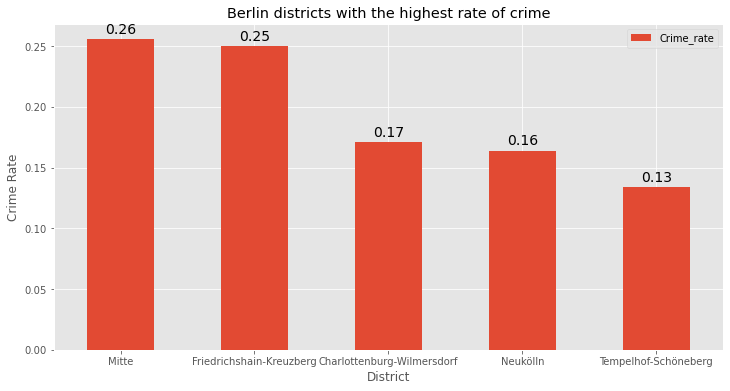

In [673]:
df_tt = df_top5[['District','Crime_rate']]

df_tt.set_index('District',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(12, 6), rot=0)

ax.set_ylabel('Crime Rate') # add to x-label to the plot
ax.set_xlabel('District') # add y-label to the plot
ax.set_title('Berlin districts with the highest rate of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

#### Sorting districts by crime_rate in ascending order to find the 5 districts with lowest crime rates

In [674]:
Berlin_crime.sort_values(['Crime_rate'], ascending = True, axis = 0, inplace = True )

df_bott5 = Berlin_crime.head() 
df_bott5

,District,Population,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local,Total,Crime_rate
9,Steglitz-Zehlendorf,293989,217,128,1884,362,862,11356,402,1927,2146,777,194,72,2709,756,412,4876,29080,0.098915
3,Marzahn-Hellersdorf,248264,239,153,2967,588,906,8605,598,1379,785,331,228,89,2656,445,544,5934,26447,0.106528
7,Reinickendorf,240454,236,129,2614,644,1092,9989,311,1706,1082,623,145,60,2227,428,843,5717,27846,0.115806
8,Spandau,223962,211,97,2744,619,1057,9694,397,1349,903,395,194,97,2332,236,606,5941,26872,0.119985
6,Pankow,366441,284,176,3174,651,1156,17202,626,1985,3976,846,201,72,4249,1224,788,8054,44664,0.121886


#### Visualising these...

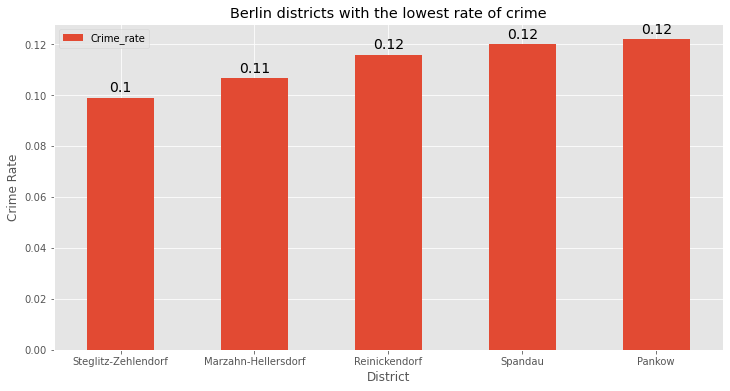

In [675]:
df_bt = df_bott5[['District','Crime_rate']]

df_bt.set_index('District',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(12, 6), rot=0)

ax.set_ylabel('Crime Rate') # add to x-label to the plot
ax.set_xlabel('District') # add y-label to the plot
ax.set_title('Berlin districts with the lowest rate of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

#### The student decides to investigate the safest district, Steglitz-Zehlendorf.

### Visualising different crimes in Steglitz-Zehlendorf

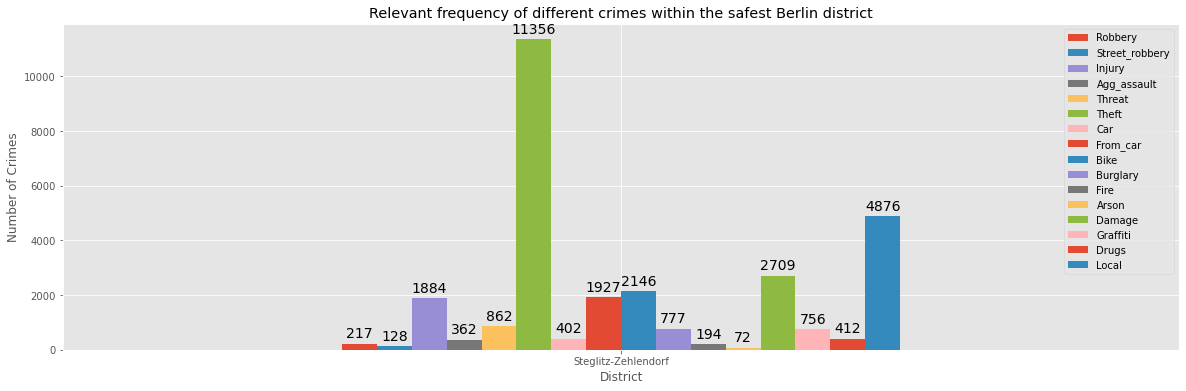

In [676]:
df_bc1 =  df_bott5[df_bott5['District'] == 'Steglitz-Zehlendorf']

df_bc = df_bc1[['District','Robbery',
 'Street_robbery',
 'Injury',
 'Agg_assault',
 'Threat',
 'Theft',
 'Car',
 'From_car',
 'Bike',
 'Burglary',
 'Fire',
 'Arson',
 'Damage',
 'Graffiti',
 'Drugs',
 'Local']]


df_bc.set_index('District',inplace = True)

ax = df_bc.plot(kind='bar', figsize=(20, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('District') # add y-label to the plot
ax.set_title('Relevant frequency of different crimes within the safest Berlin district') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

## Creating a dataset of neighbourhoods from Steglitz-Zehlendorf and generating co-ordinates

#### Ugly way to find Steglits-Zehlendorf's neighbourhoods but alas...

In [677]:
df.sort_values(['District'], ascending = False, axis = 0, inplace = True )

df_lowdist = df.head(40) 
df_lowdist

,Year,District,Code,Neighbourhood,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
97,2019,Treptow-Köpenick,90205,Oberschöneweide,10,4,335,76,96,1202,79,362,168,37,24,11,333,63,84,749
98,2019,Treptow-Köpenick,90206,Niederschöneweide,16,10,222,61,60,1042,30,83,172,20,9,4,251,106,48,418
100,2019,Treptow-Köpenick,90208,Köllnische Vorstadt/Spindlersfeld,1,1,130,31,36,360,17,52,80,13,12,4,151,33,24,259
101,2019,Treptow-Köpenick,90309,Altglienicke,11,8,213,44,78,671,88,120,91,55,16,5,164,21,39,442
102,2019,Treptow-Köpenick,90310,Bohnsdorf,5,3,107,20,42,442,25,66,61,28,5,3,118,11,14,255
103,2019,Treptow-Köpenick,90311,Grünau,2,1,33,8,23,251,12,35,73,14,15,9,136,64,8,114
104,2019,Treptow-Köpenick,90312,Schmöckwitz/Karolinenhof/Rauchfangswerder,3,0,22,3,10,79,9,8,11,0,5,4,16,3,2,42
105,2019,Treptow-Köpenick,90413,Köpenick-Süd,3,2,46,5,14,176,9,37,26,29,18,12,59,7,8,113
106,2019,Treptow-Köpenick,90414,Allende-Viertel,1,0,75,17,20,355,20,53,87,5,8,5,94,15,18,172
107,2019,Treptow-Köpenick,90415,Altstadt-Kietz,4,3,102,22,40,180,4,28,49,2,3,0,124,21,27,209


In [678]:
Neighborhood = ['Dahlem','Lankwitz','Lichterfelde','Nikolassee','Steglitz','Wannsee',
'Zehlendorf']

District = ['Steglitz_Zehlendorf','Steglitz_Zehlendorf','Steglitz_Zehlendorf','Steglitz_Zehlendorf',
          'Steglitz_Zehlendorf','Steglitz_Zehlendorf','Steglitz_Zehlendorf']

Latitude = ['','','','','','','']
Longitude = ['','','','','','','']

df_neigh = {'Neighborhood': Neighborhood,'District':District,'Latitude': Latitude,'Longitude':Longitude}
sz_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'District', 'Latitude', 'Longitude'], index=None)

sz_neig

,Neighborhood,District,Latitude,Longitude
0,Dahlem,Steglitz_Zehlendorf,,
1,Lankwitz,Steglitz_Zehlendorf,,
2,Lichterfelde,Steglitz_Zehlendorf,,
3,Nikolassee,Steglitz_Zehlendorf,,
4,Steglitz,Steglitz_Zehlendorf,,
5,Wannsee,Steglitz_Zehlendorf,,
6,Zehlendorf,Steglitz_Zehlendorf,,


In [679]:
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},Berlin, Germany'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="Berlin_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[52.4573805, 52.4336977, 52.437293, 52.4262495, 52.4572569, 52.4211482, 52.4343217] [13.2810976, 13.3454858, 13.3138645, 13.1981446, 13.3222865, 13.1589374, 13.2589298]


In [680]:
df_neigh = {'Neighborhood': Neighborhood,'District':District,'Latitude': Latitude,'Longitude':Longitude}
sz_neig = pd.DataFrame(data=df_neigh, columns=['Neighborhood', 'District', 'Latitude', 'Longitude'], index=None)

sz_neig

,Neighborhood,District,Latitude,Longitude
0,Dahlem,Steglitz_Zehlendorf,52.457380,13.281098
1,Lankwitz,Steglitz_Zehlendorf,52.433698,13.345486
2,Lichterfelde,Steglitz_Zehlendorf,52.437293,13.313864
3,Nikolassee,Steglitz_Zehlendorf,52.426249,13.198145
4,Steglitz,Steglitz_Zehlendorf,52.457257,13.322287
5,Wannsee,Steglitz_Zehlendorf,52.421148,13.158937
6,Zehlendorf,Steglitz_Zehlendorf,52.434322,13.258930


#### Visualising the Neighbourhoods of Steglitz-Zehlendorf

In [681]:
map_ber = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district, neighborhood in zip(sz_neig['Latitude'], sz_neig['Longitude'], sz_neig['District'], sz_neig['Neighborhood']):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ber)  
    
map_ber

### Modelling

* Finding all the venues within a 500 meter radius of each neighborhood.
* Perform one hot ecoding on the venues data.
* Grouping the venues by the neighborhood and calculating their mean.
* Performing a K-means clustering (Defining K = 3)

#### Create a function to extract the venues from each Neighborhood

In [682]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [683]:
sz_venues = getNearbyVenues(names=sz_neig['Neighborhood'],
                                   latitudes=sz_neig['Latitude'],
                                   longitudes=sz_neig['Longitude']
                                  )


Dahlem
Lankwitz
Lichterfelde
Nikolassee
Steglitz
Wannsee
Zehlendorf


In [684]:
print(sz_venues.shape)
sz_venues.head()

(98, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dahlem,52.457380,13.281098,Thielpark,52.454074,13.281269,Park
1,Dahlem,52.457380,13.281098,Alter Krug Dahlem,52.457550,13.288223,German Restaurant
2,Dahlem,52.457380,13.281098,Pluta Gartencenter,52.458583,13.287590,Garden Center
3,Dahlem,52.457380,13.281098,Schwarzer Grund,52.452950,13.281398,Park
4,Lankwitz,52.433698,13.345486,Gemüse Kebap,52.434719,13.342658,Fast Food Restaurant


In [685]:
sz_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Dahlem,4,4,4,4,4,4
Lankwitz,12,12,12,12,12,12
Lichterfelde,9,9,9,9,9,9
Nikolassee,5,5,5,5,5,5
Steglitz,30,30,30,30,30,30
Wannsee,12,12,12,12,12,12
Zehlendorf,26,26,26,26,26,26


In [686]:
print('There are {} uniques categories.'.format(len(sz_venues['Venue Category'].unique())))

There are 51 uniques categories.


#### One-hot encoding

In [687]:
# one hot encoding
sz_onehot = pd.get_dummies(sz_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sz_onehot['Neighborhood'] = sz_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sz_onehot.columns[-1]] + list(sz_onehot.columns[:-1])
sz_onehot = sz_onehot[fixed_columns]

sz_onehot.head()

,Neighborhood,Asian Restaurant,Austrian Restaurant,Bakery,Bank,Big Box Store,Bookstore,Burger Joint,Bus Stop,Café,...,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Trail,Trattoria/Osteria,Tree,Yoga Studio
0,Dahlem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dahlem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Dahlem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Dahlem,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lankwitz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [688]:
sz_grouped = sz_onehot.groupby('Neighborhood').mean().reset_index()
sz_grouped

,Neighborhood,Asian Restaurant,Austrian Restaurant,Bakery,Bank,Big Box Store,Bookstore,Burger Joint,Bus Stop,Café,...,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Theater,Trail,Trattoria/Osteria,Tree,Yoga Studio
0,Dahlem,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,Lankwitz,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,...,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Lichterfelde,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Nikolassee,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000
4,Steglitz,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.066667,...,0.033333,0.000000,0.000000,0.133333,0.033333,0.033333,0.0,0.066667,0.000000,0.000000
5,Wannsee,0.000000,0.083333,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,Zehlendorf,0.038462,0.000000,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.192308,...,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.0,0.000000,0.038462,0.038462


In [689]:
sz_grouped.shape

(7, 52)

In [690]:
num_top_venues = 5

for hood in sz_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sz_grouped[sz_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Dahlem----
               venue  freq
0               Park  0.50
1  German Restaurant  0.25
2      Garden Center  0.25
3   Asian Restaurant  0.00
4          Irish Pub  0.00


----Lankwitz----
               venue  freq
0          Drugstore  0.17
1             Bakery  0.17
2   Sushi Restaurant  0.08
3        Post Office  0.08
4  German Restaurant  0.08


----Lichterfelde----
                venue  freq
0  Italian Restaurant  0.22
1                Pool  0.11
2              Bakery  0.11
3            Bus Stop  0.11
4                Café  0.11


----Nikolassee----
         venue  freq
0        Plaza   0.2
1         Lake   0.2
2        Trail   0.2
3  Supermarket   0.2
4         Park   0.2


----Steglitz----
               venue  freq
0   Sushi Restaurant  0.13
1  Trattoria/Osteria  0.07
2               Café  0.07
3   Doner Restaurant  0.07
4   Asian Restaurant  0.03


----Wannsee----
             venue  freq
0      Supermarket  0.25
1  Harbor / Marina  0.17
2     Liquor Store  0.08
3    

#### Creating dataframe of venues

In [691]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
#sorting venues in descending order

In [692]:
#creating data frame and displaying top 10 values
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sz_grouped['Neighborhood']

for ind in np.arange(sz_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sz_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(7)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dahlem,Park,German Restaurant,Garden Center,Yoga Studio,Indian Restaurant,Harbor / Marina,Gym / Fitness Center,Grocery Store,Gourmet Shop,Fast Food Restaurant
1,Lankwitz,Drugstore,Bakery,Park,German Restaurant,Sushi Restaurant,Supermarket,Movie Theater,Fast Food Restaurant,Bus Stop,Post Office
2,Lichterfelde,Italian Restaurant,Bakery,Bus Stop,Café,Sculpture Garden,Pool,Eastern European Restaurant,Park,Yoga Studio,Doner Restaurant
3,Nikolassee,Trail,Supermarket,Lake,Plaza,Park,Yoga Studio,Currywurst Joint,Grocery Store,Gourmet Shop,German Restaurant
4,Steglitz,Sushi Restaurant,Doner Restaurant,Trattoria/Osteria,Café,Indie Movie Theater,Indian Restaurant,Ice Cream Shop,Gym / Fitness Center,Grocery Store,German Restaurant
5,Wannsee,Supermarket,Harbor / Marina,Indian Restaurant,Post Office,Austrian Restaurant,Bakery,Bank,Liquor Store,Chinese Restaurant,Fast Food Restaurant
6,Zehlendorf,Café,Doner Restaurant,Drugstore,Italian Restaurant,Yoga Studio,Organic Grocery,Bank,Big Box Store,Clothing Store,Fast Food Restaurant


### Using K-Means to cluster similar neighbourhoods together

In [693]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

sz_grouped_clustering = sz_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sz_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 3, 1, 0, 1], dtype=int32)

In [694]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sz_merged = sz_neig

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sz_merged = sz_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sz_merged.head() # check the last columns!

,Neighborhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dahlem,Steglitz_Zehlendorf,52.457380,13.281098,2,Park,German Restaurant,Garden Center,Yoga Studio,Indian Restaurant,Harbor / Marina,Gym / Fitness Center,Grocery Store,Gourmet Shop,Fast Food Restaurant
1,Lankwitz,Steglitz_Zehlendorf,52.433698,13.345486,1,Drugstore,Bakery,Park,German Restaurant,Sushi Restaurant,Supermarket,Movie Theater,Fast Food Restaurant,Bus Stop,Post Office
2,Lichterfelde,Steglitz_Zehlendorf,52.437293,13.313864,1,Italian Restaurant,Bakery,Bus Stop,Café,Sculpture Garden,Pool,Eastern European Restaurant,Park,Yoga Studio,Doner Restaurant
3,Nikolassee,Steglitz_Zehlendorf,52.426249,13.198145,3,Trail,Supermarket,Lake,Plaza,Park,Yoga Studio,Currywurst Joint,Grocery Store,Gourmet Shop,German Restaurant
4,Steglitz,Steglitz_Zehlendorf,52.457257,13.322287,1,Sushi Restaurant,Doner Restaurant,Trattoria/Osteria,Café,Indie Movie Theater,Indian Restaurant,Ice Cream Shop,Gym / Fitness Center,Grocery Store,German Restaurant


In [695]:
sz_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            7 non-null      object 
 1   District                7 non-null      object 
 2   Latitude                7 non-null      float64
 3   Longitude               7 non-null      float64
 4   Cluster Labels          7 non-null      int32  
 5   1st Most Common Venue   7 non-null      object 
 6   2nd Most Common Venue   7 non-null      object 
 7   3rd Most Common Venue   7 non-null      object 
 8   4th Most Common Venue   7 non-null      object 
 9   5th Most Common Venue   7 non-null      object 
 10  6th Most Common Venue   7 non-null      object 
 11  7th Most Common Venue   7 non-null      object 
 12  8th Most Common Venue   7 non-null      object 
 13  9th Most Common Venue   7 non-null      object 
 14  10th Most Common Venue  7 non-null      object

### Visualising the clusters...

In [702]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sz_merged['Latitude'], sz_merged['Longitude'], sz_merged['Neighborhood'], sz_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

Each cluster is color coded and we can see that majority of neighbourhoods fall in the purple cluster which is the cluster 1. Three neighborhoods have their own cluster (Red, Yellow and Green), these are clusters 0, 3 and 2. 

## Analysis

#### Cluster 0

In [697]:
sz_merged[sz_merged['Cluster Labels'] == 0]

,Neighborhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Wannsee,Steglitz_Zehlendorf,52.421148,13.158937,0,Supermarket,Harbor / Marina,Indian Restaurant,Post Office,Austrian Restaurant,Bakery,Bank,Liquor Store,Chinese Restaurant,Fast Food Restaurant


This cluster has 1 neighborhood with the most common venues being supermarkets, harbours, restaurants and post offices.

#### Cluster 1

In [698]:
sz_merged[sz_merged['Cluster Labels'] == 1]

,Neighborhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Lankwitz,Steglitz_Zehlendorf,52.433698,13.345486,1,Drugstore,Bakery,Park,German Restaurant,Sushi Restaurant,Supermarket,Movie Theater,Fast Food Restaurant,Bus Stop,Post Office
2,Lichterfelde,Steglitz_Zehlendorf,52.437293,13.313864,1,Italian Restaurant,Bakery,Bus Stop,Café,Sculpture Garden,Pool,Eastern European Restaurant,Park,Yoga Studio,Doner Restaurant
4,Steglitz,Steglitz_Zehlendorf,52.457257,13.322287,1,Sushi Restaurant,Doner Restaurant,Trattoria/Osteria,Café,Indie Movie Theater,Indian Restaurant,Ice Cream Shop,Gym / Fitness Center,Grocery Store,German Restaurant
6,Zehlendorf,Steglitz_Zehlendorf,52.434322,13.258930,1,Café,Doner Restaurant,Drugstore,Italian Restaurant,Yoga Studio,Organic Grocery,Bank,Big Box Store,Clothing Store,Fast Food Restaurant


The most common venues in these 4 neighbourhoods are restaurants, cafes, bakeries, and drugstores.

#### Cluster 2

In [699]:
sz_merged[sz_merged['Cluster Labels'] == 2]

,Neighborhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dahlem,Steglitz_Zehlendorf,52.45738,13.281098,2,Park,German Restaurant,Garden Center,Yoga Studio,Indian Restaurant,Harbor / Marina,Gym / Fitness Center,Grocery Store,Gourmet Shop,Fast Food Restaurant


This cluster has 1 neighbourhood with the most common venues being parks, restaurants, garden centres and yoga studios.

#### Cluster 3

In [700]:
sz_merged[sz_merged['Cluster Labels'] == 3]

,Neighborhood,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Nikolassee,Steglitz_Zehlendorf,52.426249,13.198145,3,Trail,Supermarket,Lake,Plaza,Park,Yoga Studio,Currywurst Joint,Grocery Store,Gourmet Shop,German Restaurant


This cluster has 1 neighbourhood with the most common venues being trails, supermarkets, lakes, plazas and the park.

## Results and Discussion

This project aimed to help a student identify the safest borough to relocate to in Berlin and to help them identify the ideal neighbourhoods to consider based on their specific set of preferences. From this analysis, cluster 1 appears to meet the students needs most closely, and upon closer inspection, Steglitz in particular. Steglitz offers many favourable activties for young people with many different restaurants, movie theatres, fitness centres and being the closest neighbourhood to the centre of Berlin it offers the greatest connectivity too. However, for people less concerned with these factors and seeking a more peaceful location, Dahlem and Nikolassee offer various parks, lakes and garden centres.

## Conclusion

This project usefully enables individuals the chance to filter and identify locations based on their safety and selection of venues, however, it could be adapted to account for any number of features such as including the consideration of house prices in each area should budget be an issue. Further analysis may also consider the crime rates within each district in order to more accurately make a decsision on the preferred neighbourhood location. Additonally, further use might be made of the specific breakdown of crimes in each area as a student may deem themselves more or less at risk to a certain selection of factors than an older individual e.g. car theft would likely be less of a contributing factor for a foreign student.